# Zomato Data Analysis

<hr style="border:2px solid gray"> </hr>

### Problem Statement : 
**Clean the Zomato Dataset and analyze the key metrics, Find the correlation between the attributes, Draw some insights from data set.**

<hr style="border:2px solid gray"> </hr>


## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!pip install openpyxl

<hr style="border:2px solid gray"> </hr>


## Load data set

In [3]:
table1 =pd.read_csv('zomato.csv',encoding='latin-1')
table2 =pd.read_excel('Country-Code.xlsx')

<hr style="border:2px solid gray"> </hr>


## Merge the table and make final Dataframe

In [4]:
df=pd.merge(table1,table2,on='Country Code', how='left')

<hr style="border:2px solid gray"> </hr>

## View the Dataframe

In [5]:
df.sample(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
6966,18489497,Mughlai Point,1,New Delhi,"Shop 78, Ring Road Market, Sarojini Nagar, New...",Sarojini Nagar,"Sarojini Nagar, New Delhi",77.193851,28.569817,Mughlai,...,No,No,No,No,1,0.0,White,Not rated,1,India
439,17615979,Mrs. Wilkes' Dining Room,216,Savannah,"107 W Jones St, Savannah, GA 31401",Savannah,"Savannah, Savannah",-81.095500,32.072700,"American, Southern",...,No,No,No,No,3,4.5,Dark Green,Excellent,1014,United States
9502,5800755,Upali's,191,Colombo,"65, C.W.W Kannangara Mawatha, Near Town Hall, ...","Cinnamon Gardens, Colombo 07","Cinnamon Gardens, Colombo 07, Colombo",79.864727,6.912529,Sri Lankan,...,No,No,No,No,3,4.0,Green,Very Good,114,Sri Lanka
4887,18336529,Nutrition Theka,1,New Delhi,"Shop A-4, Block B-4, Keshav Puram, Lawrence Ro...",Lawrence Road,"Lawrence Road, New Delhi",77.159706,28.688926,Cafe,...,No,No,No,No,2,3.3,Orange,Average,12,India
7939,18225627,Pudding & Pie,1,New Delhi,"19, Near Yamuna Sports Complex, Vigyan Vihar, ...",Vivek Vihar,"Vivek Vihar, New Delhi",77.210000,28.630000,"Bakery, Fast Food",...,No,No,No,No,1,3.1,Orange,Average,5,India


<hr style="border:2px solid gray"> </hr>


## Shape of DataFrame

In [6]:
df.shape

(9551, 22)

<hr style="border:2px solid gray"> </hr>

## Find Column Names

In [7]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

<hr style="border:2px solid gray"> </hr>


## Find the datatype of attributes

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

<hr style="border:2px solid gray"> </hr>


## Number of Numerical columns and Categorical columns

In [9]:
# Number of Categorical columns
no_cat_col=len(df.dtypes[df.dtypes == object])
print(f"The Number of categorical columns is {no_cat_col}")

The Number of categorical columns is 14


In [10]:
# Number of Numerical Columns
no_num_col = len(df.dtypes[df.dtypes != object])
print(f"The Number of Numerical columns is {no_num_col}")

The Number of Numerical columns is 8


<hr style="border:2px solid gray"> </hr>


## Manual Validate the Columns Datatypes

In [11]:
col = df.columns
for i in col:
    print(df[i].head())

0    6317637
1    6304287
2    6300002
3    6318506
4    6314302
Name: Restaurant ID, dtype: int64
0          Le Petit Souffle
1          Izakaya Kikufuji
2    Heat - Edsa Shangri-La
3                      Ooma
4               Sambo Kojin
Name: Restaurant Name, dtype: object
0    162
1    162
2    162
3    162
4    162
Name: Country Code, dtype: int64
0         Makati City
1         Makati City
2    Mandaluyong City
3    Mandaluyong City
4    Mandaluyong City
Name: City, dtype: object
0    Third Floor, Century City Mall, Kalayaan Avenu...
1    Little Tokyo, 2277 Chino Roces Avenue, Legaspi...
2    Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...
3    Third Floor, Mega Fashion Hall, SM Megamall, O...
4    Third Floor, Mega Atrium, SM Megamall, Ortigas...
Name: Address, dtype: object
0     Century City Mall, Poblacion, Makati City
1    Little Tokyo, Legaspi Village, Makati City
2    Edsa Shangri-La, Ortigas, Mandaluyong City
3        SM Megamall, Ortigas, Mandaluyong City
4        SM Me

<hr style="border:2px solid gray"> </hr>


## Find missing value

In [12]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [13]:
[features for features in df.columns if df[features].isnull().sum()>0]

['Cuisines']

<hr style="border:2px solid gray"> </hr>

## Statistical Describe Numerical Column

In [14]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


<hr style="border:2px solid gray"> </hr>


## Statistical Describe Categorical Column

In [15]:
cat_col = df[df.dtypes[df.dtypes == 'object'].index]

In [16]:
cat_col.describe()

,Restaurant Name,City,Address,Locality,Locality Verbose,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Rating color,Rating text,Country
count,9551,9551,9551,9551,9551,9542,9551,9551,9551,9551,9551,9551,9551,9551
unique,7446,141,8918,1208,1265,1825,12,2,2,2,1,6,6,15
top,Cafe Coffee Day,New Delhi,"Dilli Haat, INA, New Delhi",Connaught Place,"Connaught Place, New Delhi",North Indian,Indian Rupees(Rs.),No,No,No,No,Orange,Average,India
freq,83,5473,11,122,122,936,8652,8393,7100,9517,9551,3737,3737,8652


<hr style="border:2px solid gray"> </hr>


## Initial Findings

* Number of columns 22
* Number of rows 9551
* Number of categorical columns is 14
* Number of Numerical columns is 8
* Missing values is Cuisines column total value 9

<hr style="border:2px solid gray"> </hr>

## Correlation Between the columns

In [17]:
df.corr()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
Restaurant ID,1.000000,0.148471,-0.226081,-0.052081,-0.001693,-0.134540,-0.326212,-0.147023
Country Code,0.148471,1.000000,-0.698299,0.019792,0.043225,0.243327,0.282189,0.154530
Longitude,-0.226081,-0.698299,1.000000,0.043207,0.045891,-0.078939,-0.116818,-0.085101
Latitude,-0.052081,0.019792,0.043207,1.000000,-0.111088,-0.166688,0.000516,-0.022962
Average Cost for two,-0.001693,0.043225,0.045891,-0.111088,1.000000,0.075083,0.051792,0.067783
Price range,-0.134540,0.243327,-0.078939,-0.166688,0.075083,1.000000,0.437944,0.309444
Aggregate rating,-0.326212,0.282189,-0.116818,0.000516,0.051792,0.437944,1.000000,0.313691
Votes,-0.147023,0.154530,-0.085101,-0.022962,0.067783,0.309444,0.313691,1.000000


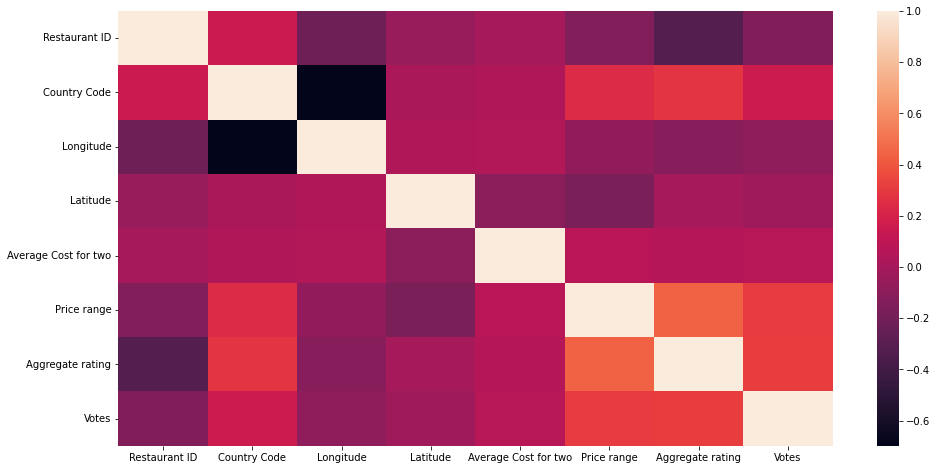

In [18]:
plt.figure(figsize=[16,8])
sns.heatmap(df.corr())
plt.show()

<hr style="border:2px solid gray"> </hr>

## Top Three Country use Zomato

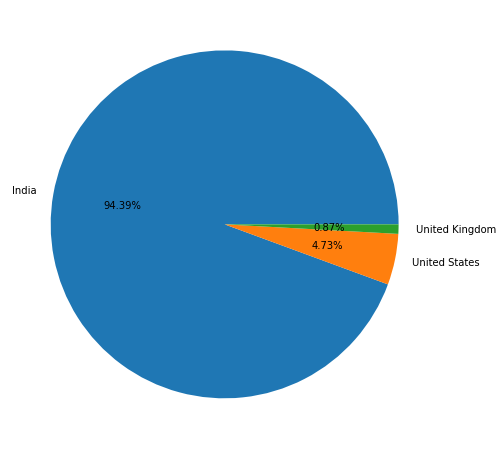

In [19]:
country_names=df.Country.value_counts().index
country_val=df.Country.value_counts().values

plt.figure(figsize=[16,8])
plt.pie(country_val[:3],labels=country_names[:3],autopct='%1.2f%%')
plt.show()

<hr style="border:2px solid gray"> </hr>

## Find the countries name that has given 0 rating

In [20]:
df[df['Rating color']=='White'].groupby('Country').size().reset_index()

,Country,0
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


In [21]:
df.groupby(['Aggregate rating','Country']).size().reset_index().head(5)

,Aggregate rating,Country,0
0,0.0,Brazil,5
1,0.0,India,2139
2,0.0,United Kingdom,1
3,0.0,United States,3
4,1.8,India,1


Observations Maximum number of 0 ratings are from Indian customers

<hr style="border:2px solid gray"> </hr>

## Find out which currency is used by which country?

In [22]:
df[['Country','Currency']].groupby(['Country','Currency']).size().reset_index()

,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


<hr style="border:2px solid gray"> </hr>

## Which Countries do have online deliveries option

In [23]:
df[df['Has Online delivery'] =="Yes"].Country.value_counts()

India    2423
UAE        28
Name: Country, dtype: int64

Online Deliveries are available in India and UAE

<hr style="border:2px solid gray"> </hr>

## Create a pie chart for top 5 cities distribution

In [24]:
city_values=df.City.value_counts().values
city_labels=df.City.value_counts().index

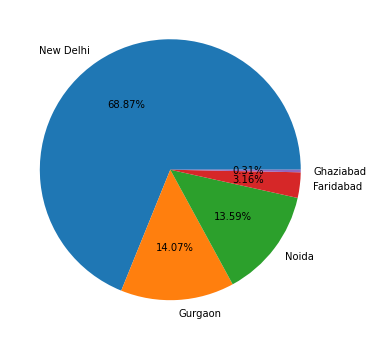

In [25]:
plt.figure(figsize=[14,6])
plt.pie(city_values[:5],labels=city_labels[:5],autopct='%1.2f%%')
plt.show()

<hr style="border:2px solid gray"> </hr>

## Find Top 10 cuisines

In [26]:
cusin_values=df.Cuisines.value_counts().values
cusin_labels=df.Cuisines.value_counts().index

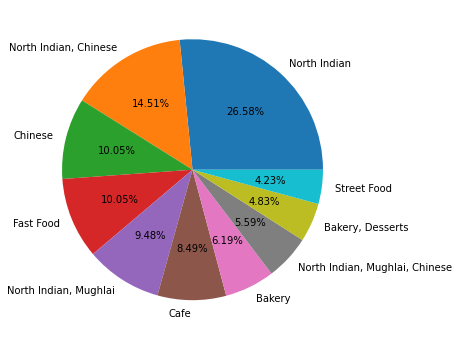

In [27]:
plt.figure(figsize=[14,6])
plt.pie(cusin_values[:10],labels=cusin_labels[:10],autopct='%1.2f%%')
plt.show()

<hr style="border:2px solid gray"> </hr>

## Conclusion

**1. Missing Values are present in Cuisines column and no. of values is 9.**

**2. UK, US, INDIA is top three country use zomato.**

**3. Maximum number of 0 ratings are from Indian customers**

**4. Online Deliveries are available in India and UAE**

**5. Top 5 City use zomato in india are Delhi, Noida, Ghaziyabad, Faridabad, Gurgaon.**

**6. Top 10 Cuisines on zomato are North Indian, Street Food, Bakery Desert, North Indian Mugalai Chinese, Bakery, Cafe, North Indian Mugalai, Fast Food, Chinese, North Indian Chinese**

<hr style="border:2px solid gray"> </hr>